<a href="https://colab.research.google.com/github/UGM-Geofisika/Thesis/blob/master/Plot_Tmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install xarray[complete]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 206.9/206.9 kB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.0/354.0 kB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.3/53.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 31.4 MB/s eta 0:00:00
  Created wheel for numpy-groupies: filename=numpy_groupies-0.9.22-py3-none-any.whl size=25844 sha256=03d166c300f18969434ddfbc80502970230cc5de0be173b43b84bad0d5a9a798
  Stored in directory: /root/.cache/pip/wheels/5b/ce/73/9192b12bb05cc6a44ba159cb733270b1539004037302a42077
  Crea

In [14]:
!pip install importlib-metadata==4.13.0

In [16]:
import glob
import matplotlib.pyplot as plt
import urllib.request
import xarray as xr

In [18]:
for yr in range(2022, 2023):
  urlt = f'https://downloads.psl.noaa.gov/Datasets/cpc_global_temp/tmax.{yr}.nc'
  savenamet = urlt.split('/')[-1]
  urllib.request.urlretrieve(urlt,savenamet)

In [37]:
dt2022 = xr.open_dataset('tmax.2022.nc')

In [38]:
dt2022_mon = dt2022.groupby('time.month').mean()

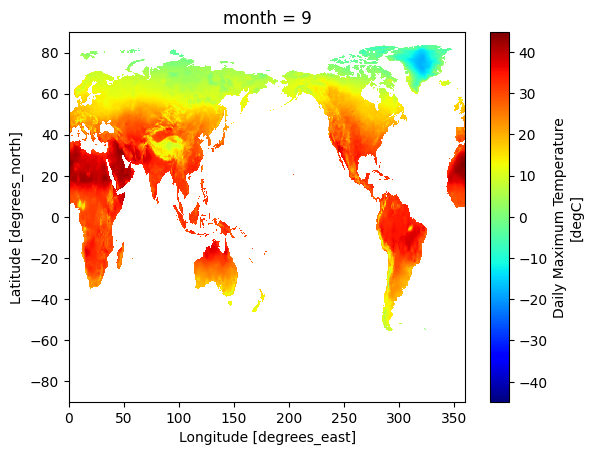

In [39]:
a = dt2022_mon.tmax[8, :, :]
a.plot(cmap = 'jet')

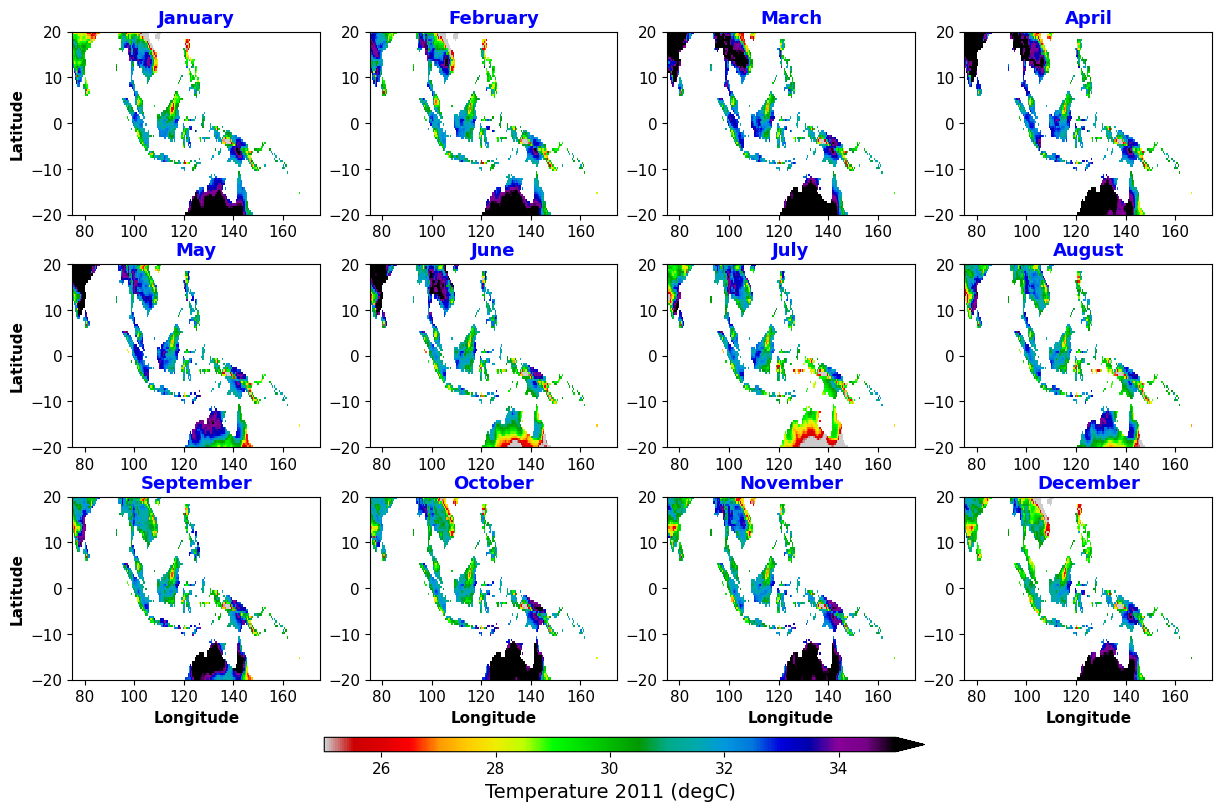

In [40]:
import calendar

b = dt2022_mon.tmax
landmask = dt2022.tmax.sum(dim = 'time') > 0
fig = plt.figure(figsize = [12, 8], facecolor = 'w')
plt.subplots_adjust(bottom = 0.15, top = 0.96, left = 0.04, right = 0.99,
                    wspace = 0.2, hspace = 0.27)
nrows = 3
ncols = 4
for i in range(1, 13):
  plt.subplot(nrows, ncols, i)
  dataplot = ((dt2022_mon.tmax[i-1, :, :])).where(landmask)
  p = plt.pcolormesh(dt2022_mon.lon, dt2022_mon.lat, dataplot,
                    cmap = 'nipy_spectral_r', vmin=25, vmax=35)
  plt.xlim([75, 175])
  plt.ylim([-20, 20])
  plt.title(calendar.month_name[dataplot.month.values], fontsize = 13,
            fontweight = 'bold', color = 'b')
  plt.xticks(fontsize = 11)
  plt.yticks(fontsize = 11)
  if i % ncols == 1:
    plt.ylabel('Latitude', fontsize = 11, fontweight = 'bold')
  if i > ncols * (nrows-1):
    plt.xlabel('Longitude', fontsize = 11, fontweight = 'bold')

cax = fig.add_axes([0.25, 0.06, 0.5, 0.018])
cb = plt.colorbar(cax = cax, orientation = 'horizontal', extend = 'max')
cb.ax.tick_params(labelsize = 11)
cb.set_label(label = 'Temperature 2011 (degC)', color = 'k', size = 14)

In [41]:
top = 20
bottom = -20
left = 75
right = 175

dt_sel = dt2022.isel(lon = (dt2022.lon >= left) & (dt2022.lon <= right),
                           lat = (dt2022.lat >= bottom) & (dt2022.lat <= top))

In [44]:
df = dt_sel.to_dataframe()
df.head

<bound method NDFrame.head of                                tmax
lat    lon    time                 
 19.75 75.25  2022-01-01  27.199163
              2022-01-02  28.535841
              2022-01-03  29.419254
              2022-01-04  29.909775
              2022-01-05  29.647617
...                             ...
-19.75 174.75 2022-12-27        NaN
              2022-12-28        NaN
              2022-12-29        NaN
              2022-12-30        NaN
              2022-12-31        NaN

[5840000 rows x 1 columns]>

In [46]:
df.dropna()

tmax
lat    lon    time                 
 19.75 75.25  2022-01-01  27.199163
              2022-01-02  28.535841
              2022-01-03  29.419254
              2022-01-04  29.909775
              2022-01-05  29.647617
...                             ...
-19.75 147.75 2022-12-27  29.889223
              2022-12-28  30.476318
              2022-12-29  30.270084
              2022-12-30  31.141829
              2022-12-31  30.767633

[870160 rows x 1 columns]

In [48]:
df.to_csv('tmax2022')